#### Normalización de variables

Datos de Ejemplo
Supongamos que estamos trabajando con un conjunto de datos más grande. Generaremos un conjunto de datos sintéticos similar a los datos de vino, y luego aplicaremos transformaciones y visualizaremos los resultados.

Generación de Datos Sintéticos

Explicación del Código
Generación de Datos Sintéticos:

Utilizamos distribuciones gamma para generar datos sintéticos que imitan las distribuciones sesgadas de residual_sugar y free_sulfur_dioxide.
Transformaciones:

Logarítmica: Aplicamos np.log1p (log(1 + x)) a residual_sugar para manejar valores que podrían ser cero o cercanos a cero.
Raíz Cuadrada: Aplicamos np.sqrt a free_sulfur_dioxide.
Visualización:

Utilizamos seaborn.histplot para crear histogramas con estimaciones de densidad (KDE) para comparar las distribuciones originales y transformadas.
Validación de las Transformaciones
Para validar que las transformaciones han normalizado las distribuciones y mejorado los modelos predictivos, puedes seguir estos pasos:

Visualización de Distribuciones:

Observa las distribuciones antes y después de las transformaciones.
Verifica que las distribuciones transformadas se aproximen más a una distribución normal.
Medidas de Asimetría (Skewness) y Curtosis (Kurtosis):

Calcula la asimetría y curtosis de las variables antes y después de la transformación.
Valores cercanos a 0 para la asimetría indican una distribución más simétrica.
Valores cercanos a 3 para la curtosis indican una distribución normal.
Comparación de Modelos:

Entrena modelos predictivos (e.g., regresión lineal) utilizando las variables originales y transformadas.
Compara el desempeño de los modelos utilizando métricas como R^2, RMSE, etc.

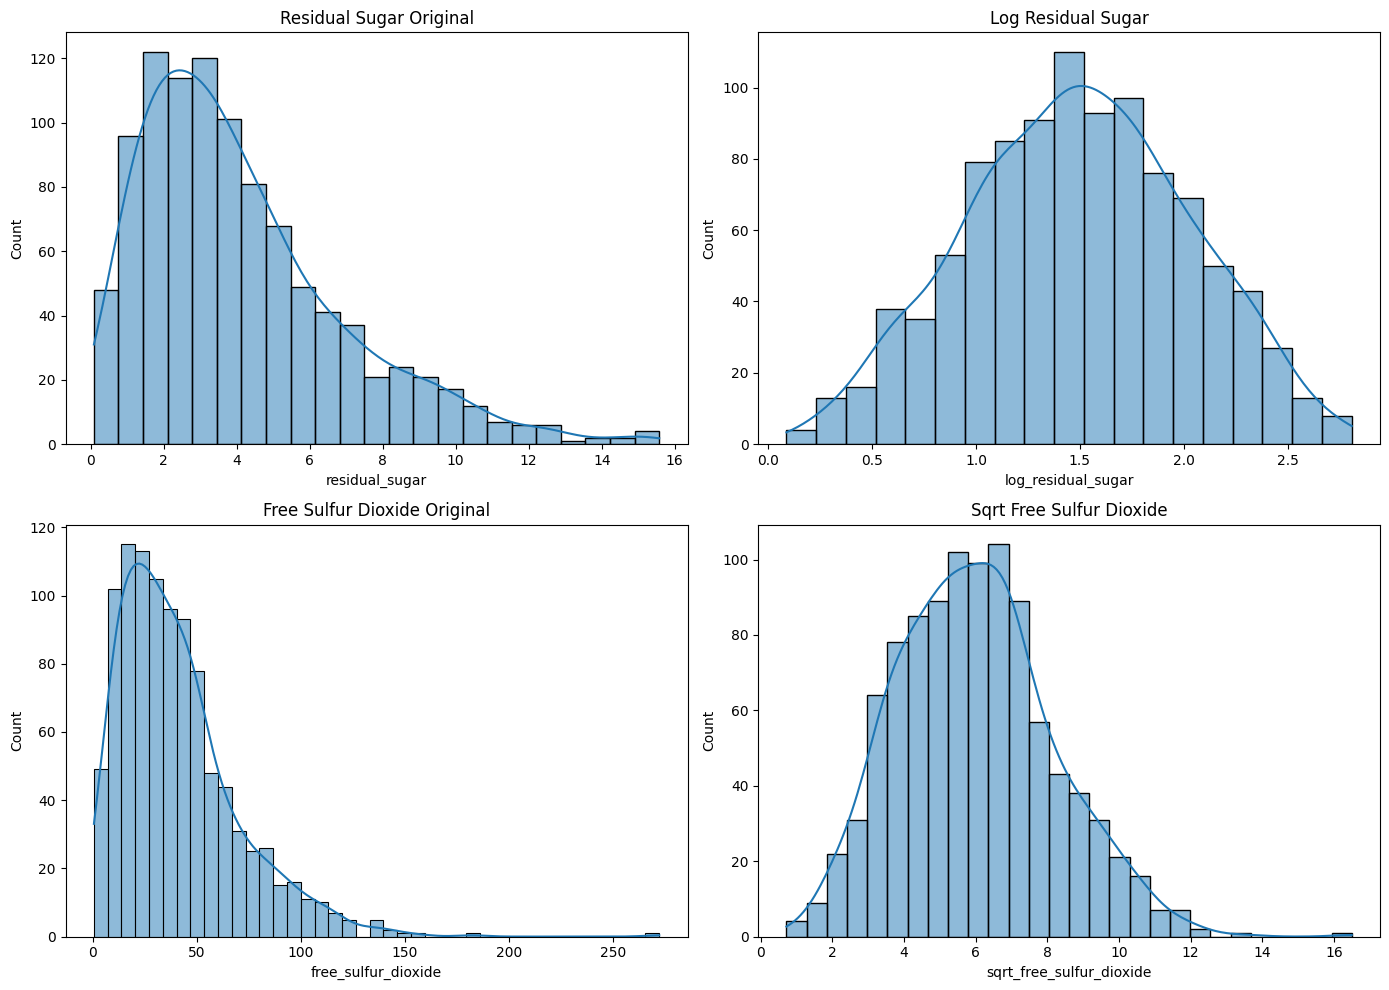

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generar datos sintéticos
np.random.seed(42)
data = {
    'residual_sugar': np.random.gamma(2, 2, 1000),
    'free_sulfur_dioxide': np.random.gamma(2, 20, 1000)
}
df = pd.DataFrame(data)

# Transformación logarítmica
df['log_residual_sugar'] = np.log1p(df['residual_sugar'])  # log1p es log(1 + x) para manejar 0s

# Transformación de raíz cuadrada
df['sqrt_free_sulfur_dioxide'] = np.sqrt(df['free_sulfur_dioxide'])

# Visualización
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Residual sugar original y transformado
sns.histplot(df['residual_sugar'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Residual Sugar Original')

sns.histplot(df['log_residual_sugar'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Log Residual Sugar')

# Free sulfur dioxide original y transformado
sns.histplot(df['free_sulfur_dioxide'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Free Sulfur Dioxide Original')

sns.histplot(df['sqrt_free_sulfur_dioxide'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Sqrt Free Sulfur Dioxide')

plt.tight_layout()
plt.show()


Cálculo de Asimetría y Curtosis
Aquí tienes un ejemplo de cómo calcular estas métricas en Python:

In [4]:
from scipy.stats import skew, kurtosis

# Asimetría y curtosis antes de la transformación
original_skew_sugar = skew(df['residual_sugar'])
original_kurt_sugar = kurtosis(df['residual_sugar'])
original_skew_sulfur = skew(df['free_sulfur_dioxide'])
original_kurt_sulfur = kurtosis(df['free_sulfur_dioxide'])

# Asimetría y curtosis después de la transformación
transformed_skew_sugar = skew(df['log_residual_sugar'])
transformed_kurt_sugar = kurtosis(df['log_residual_sugar'])
transformed_skew_sulfur = skew(df['sqrt_free_sulfur_dioxide'])
transformed_kurt_sulfur = kurtosis(df['sqrt_free_sulfur_dioxide'])

print(f"Original Residual Sugar Skewness: {original_skew_sugar}, Kurtosis: {original_kurt_sugar}")
print(f"Transformed Residual Sugar Skewness: {transformed_skew_sugar}, Kurtosis: {transformed_kurt_sugar}")

print(f"Original Free Sulfur Dioxide Skewness: {original_skew_sulfur}, Kurtosis: {original_kurt_sulfur}")
print(f"Transformed Free Sulfur Dioxide Skewness: {transformed_skew_sulfur}, Kurtosis: {transformed_kurt_sulfur}")


Original Residual Sugar Skewness: 1.1962783386596862, Kurtosis: 1.4302267657323364
Transformed Residual Sugar Skewness: -0.03746055623010555, Kurtosis: -0.482240543141534
Original Free Sulfur Dioxide Skewness: 1.5976243789978715, Kurtosis: 5.244906674824055
Transformed Free Sulfur Dioxide Skewness: 0.4149443103250107, Kurtosis: 0.2566329716746627


Interpretación de Resultados
Asimetría: Un valor de asimetría cercano a 0 indica que la distribución es simétrica.
Curtosis: Un valor de curtosis cercano a 3 indica una distribución normal (mesocúrtica).
Conclusión
Transformar variables sesgadas puede ayudar a normalizar las distribuciones y mejorar el rendimiento de los modelos predictivos. Validar estas transformaciones mediante visualización, medidas estadísticas y comparaciones de modelos es crucial para asegurar que las transformaciones sean efectivas.